GOODREADS QUOTE ANALYSIS PROJECT

In [85]:
#importing libraries

import re
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

#creating empty lists

quote = []
author = []
tags = []
likes = []
quote_length = []
word_count = []

#iterating loop through page numbers from 1 to 21

for i in range(1, 21):
    url = f"https://www.goodreads.com/quotes?page={i}"
    print(f"Scraping page {i}")

    # sending http request with user-agent(To avoid blocking)
    
    page = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})

    # parse the html content using BeautifulSoup
    
    soup = BeautifulSoup(page.text, "html.parser")


    # Extrcating all quotes using for loop
    
    for j in soup.find_all("div", class_="quote"):
        text = " ".join(j.text.split())
        regex = re.findall(r'“(.*)”', text, re.M)
        if regex:
            quote.append(regex[0])  
        else:
            quote.append(np.nan)

    # Extracting Author name

    for j in soup.find_all("div",class_="quote"):
        text = " ".join(j.text.split())
        regex = re.findall(r'―\s*(.*?)(?:,|\stags:|\s\d+\slikes)',text,re.M)
        if regex:
            author.append(regex[0].strip())
        else:
            author.append(np.nan)

    # Extracting tags
    
    for j in soup.find_all("div",class_="quote"):
        text = " ".join(j.text.split())
        regex = re.findall(r'tags:\s*(.*?)(?:\s\d+\slikes|$)',text,re.M)
        if regex:
            tags.append(regex[0].strip())
        else:
            tags.append(np.nan)

    # Extracting Likes

    for j in soup.find_all("div",class_="quote"):
        text = " ".join(j.text.split())
        regex = re.findall(r'(\d+)\s+likes',text,re.M)
        if regex:
            likes.append(int(regex[0]))
        else:
            likes.append(np.nan)
    

    # Quote_Length
    
    for j in soup.find_all("div", class_="quote"):
        text = " ".join(j.text.split())
        regex = re.findall(r'“(.*?)”', text)
        if regex:
            quote_text =regex[0].strip()
            quote_length.append(len(quote_text))
        else:
            quote_length.append(np.nan)

    # Word_Count for a quote
    
    for j in soup.find_all("div", class_="quote"):
        text = " ".join(j.text.split())
        regex = re.findall(r'“(.*?)”', text)
        if regex:
            quote_text =regex[0].strip()
            word_count.append(len(quote_text.split()))
        else:
            word_count.append(np.nan)

# Here i am printing length,s all lists

print(len(quote))
print(len(author))
print(len(tags)) 
print(len(likes)) 
print(len(quote_length)) 
print(len(word_count)) 

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
600
600
600
600
600
600


In [86]:
#Creating dataframe using pandas library

df = pd.DataFrame({
            "Quote_Text" : quote,
            "Author":author,
            "Likes":likes,
            "Tags":tags,
            "Quote_Length":quote_length,
            "Word_Count":word_count
        })
df

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count
0,Be yourself; everyone else is already taken.,Oscar Wilde,177197,"attributed-no-source, be-yourself, gilbert-per...",44,7
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,165268,"attributed-no-source, best, life, love, misatt...",202,41
2,"So many books, so little time.",Frank Zappa,151501,"books, humor",30,6
3,Two things are infinite: the universe and huma...,Albert Einstein,148452,"attributed-no-source, human-nature, humor, inf...",95,16
4,A room without books is like a body without a ...,Marcus Tullius Cicero,135544,"attributed-no-source, books, simile, soul",51,11
...,...,...,...,...,...,...
595,"Give a girl the right shoes, and she can conqu...",Bette Midler,7615,misattributed-to-marilyn-monroe,59,12
596,"We're all going to die, all of us, what a circ...",Charles Bukowski,7613,NaN,184,35
597,Courage is the most important of all the virtu...,Maya Angelou,7606,"character, consistency, courage, determination...",123,19
598,"This above all: to thine own self be true, And...",William Shakespeare,7590,NaN,125,27


In [87]:
df.to_csv("goodQuotes.csv",index=False)  # save dataframe into csv file

In [88]:
df = pd.read_csv("goodQuotes.csv")  # read the csv file
df

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count
0,Be yourself; everyone else is already taken.,Oscar Wilde,177197,"attributed-no-source, be-yourself, gilbert-per...",44,7
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,165268,"attributed-no-source, best, life, love, misatt...",202,41
2,"So many books, so little time.",Frank Zappa,151501,"books, humor",30,6
3,Two things are infinite: the universe and huma...,Albert Einstein,148452,"attributed-no-source, human-nature, humor, inf...",95,16
4,A room without books is like a body without a ...,Marcus Tullius Cicero,135544,"attributed-no-source, books, simile, soul",51,11
...,...,...,...,...,...,...
595,"Give a girl the right shoes, and she can conqu...",Bette Midler,7615,misattributed-to-marilyn-monroe,59,12
596,"We're all going to die, all of us, what a circ...",Charles Bukowski,7613,NaN,184,35
597,Courage is the most important of all the virtu...,Maya Angelou,7606,"character, consistency, courage, determination...",123,19
598,"This above all: to thine own self be true, And...",William Shakespeare,7590,NaN,125,27


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Quote_Text    600 non-null    object
 1   Author        600 non-null    object
 2   Likes         600 non-null    int64 
 3   Tags          519 non-null    object
 4   Quote_Length  600 non-null    int64 
 5   Word_Count    600 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [90]:
df.describe()

,Likes,Quote_Length,Word_Count
count,600.000000,600.0000,600.000000
mean,19585.978333,159.8250,30.088333
std,21729.960631,261.8808,48.409327
min,7578.000000,19.0000,4.000000
25%,9101.500000,64.0000,12.000000
50%,11907.000000,90.0000,18.000000
75%,20568.250000,148.2500,28.000000
max,177197.000000,3652.0000,686.000000


In [91]:
df.head()

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count
0,Be yourself; everyone else is already taken.,Oscar Wilde,177197,"attributed-no-source, be-yourself, gilbert-per...",44,7
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,165268,"attributed-no-source, best, life, love, misatt...",202,41
2,"So many books, so little time.",Frank Zappa,151501,"books, humor",30,6
3,Two things are infinite: the universe and huma...,Albert Einstein,148452,"attributed-no-source, human-nature, humor, inf...",95,16
4,A room without books is like a body without a ...,Marcus Tullius Cicero,135544,"attributed-no-source, books, simile, soul",51,11


In [92]:
df.tail()

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count
595,"Give a girl the right shoes, and she can conqu...",Bette Midler,7615,misattributed-to-marilyn-monroe,59,12
596,"We're all going to die, all of us, what a circ...",Charles Bukowski,7613,NaN,184,35
597,Courage is the most important of all the virtu...,Maya Angelou,7606,"character, consistency, courage, determination...",123,19
598,"This above all: to thine own self be true, And...",William Shakespeare,7590,NaN,125,27
599,The best index to a person's character is how ...,Abigail Van Buren,7578,"character, life, wisdom",136,27


In [93]:
df.shape

(600, 6)

In [94]:
df.columns

Index(['Quote_Text', 'Author', 'Likes', 'Tags', 'Quote_Length', 'Word_Count'], dtype='object')

In [95]:
df.isna().sum()

Quote_Text       0
Author           0
Likes            0
Tags            81
Quote_Length     0
Word_Count       0
dtype: int64

In [96]:
df.isna().sum()*100/len(df)

Quote_Text       0.0
Author           0.0
Likes            0.0
Tags            13.5
Quote_Length     0.0
Word_Count       0.0
dtype: float64

In [97]:
df['Tags'] = df['Tags'].fillna('Unknown')

In [98]:
df['Tags'].value_counts().head()

Tags
Unknown                 81
love                    17
inspirational           13
attributed-no-source     8
life                     6
Name: count, dtype: int64

In [99]:
df.isna().sum()*100/len(df)

Quote_Text      0.0
Author          0.0
Likes           0.0
Tags            0.0
Quote_Length    0.0
Word_Count      0.0
dtype: float64

# outlier detection 

In [100]:
q1 = df["Likes"].quantile(0.25) 

q3 = df["Likes"].quantile(0.75)

iqr = q3-q1

In [101]:
print(q1)
print(q3)
print(iqr)

9101.5
20568.25
11466.75


In [102]:
lb = q1-(1.5*iqr)
ub = q3+((1.5*iqr))
print(lb)
print(ub)

-8098.625
37768.375


In [103]:
df1 = df[(df.Likes<lb)|(df.Likes>ub)]
df1

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count
0,Be yourself; everyone else is already taken.,Oscar Wilde,177197,"attributed-no-source, be-yourself, gilbert-per...",44,7
1,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,165268,"attributed-no-source, best, life, love, misatt...",202,41
2,"So many books, so little time.",Frank Zappa,151501,"books, humor",30,6
3,Two things are infinite: the universe and huma...,Albert Einstein,148452,"attributed-no-source, human-nature, humor, inf...",95,16
4,A room without books is like a body without a ...,Marcus Tullius Cicero,135544,"attributed-no-source, books, simile, soul",51,11
5,"Be who you are and say what you feel, because ...",Bernard M. Baruch,130212,"ataraxy, be-yourself, confidence, fitting-in, ...",107,21
6,You've gotta dance like there's nobody watchin...,William W. Purkey,128931,"dance, heaven, hurt, inspirational, life, love...",149,22
7,You know you're in love when you can't fall as...,Dr. Seuss,127157,"attributed-no-source, dreams, love, reality, s...",102,18
8,"You only live once, but if you do it right, on...",Mae West,119105,"humor, life",59,13
9,Be the change that you wish to see in the world.,Mahatma Gandhi,114383,"action, change, inspirational, misattributed-t...",48,11


In [104]:
# Removing outliers

df1 = df[(df.Likes<lb)|(df.Likes>ub)].index
print(df1)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
      dtype='int64')


In [105]:
df = df.drop(df1)
df

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count
54,I am enough of an artist to draw freely upon m...,Albert Einstein,37579,"1929, viereck-interview",161,25
55,I solemnly swear that I am up to no good.,J.K. Rowling,37375,mischief,41,10
56,"Love all, trust a few,Do wrong to none: be abl...",William Shakespeare,37057,"do-wrong, love, trust, wrong",184,33
57,Have you ever been in love? Horrible isn't it?...,Neil Gaiman,36848,love,183,37
58,"I like nonsense, it wakes up the brain cells. ...",Dr. Seuss,36842,fantasy,90,16
...,...,...,...,...,...,...
595,"Give a girl the right shoes, and she can conqu...",Bette Midler,7615,misattributed-to-marilyn-monroe,59,12
596,"We're all going to die, all of us, what a circ...",Charles Bukowski,7613,Unknown,184,35
597,Courage is the most important of all the virtu...,Maya Angelou,7606,"character, consistency, courage, determination...",123,19
598,"This above all: to thine own self be true, And...",William Shakespeare,7590,Unknown,125,27


In [106]:
df.reset_index(drop=True,inplace=True)
df

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count
0,I am enough of an artist to draw freely upon m...,Albert Einstein,37579,"1929, viereck-interview",161,25
1,I solemnly swear that I am up to no good.,J.K. Rowling,37375,mischief,41,10
2,"Love all, trust a few,Do wrong to none: be abl...",William Shakespeare,37057,"do-wrong, love, trust, wrong",184,33
3,Have you ever been in love? Horrible isn't it?...,Neil Gaiman,36848,love,183,37
4,"I like nonsense, it wakes up the brain cells. ...",Dr. Seuss,36842,fantasy,90,16
...,...,...,...,...,...,...
541,"Give a girl the right shoes, and she can conqu...",Bette Midler,7615,misattributed-to-marilyn-monroe,59,12
542,"We're all going to die, all of us, what a circ...",Charles Bukowski,7613,Unknown,184,35
543,Courage is the most important of all the virtu...,Maya Angelou,7606,"character, consistency, courage, determination...",123,19
544,"This above all: to thine own self be true, And...",William Shakespeare,7590,Unknown,125,27


# Data types in a DataSet

# categorical Variables

 1. Author
 3. Tags

# Numerical variables
 1. Likes
 2. Quote_length
 3. Word_Count



# No Countinous variable in Dataset

# Analysis on Uni-Variate and By-Variate

# Uni-Variate Numerical Analysis

In [107]:
for i in ['Likes','Quote_Length','Word_Count']:
    print(f"\nNumerical Analysis on {i} \n")
    print(df[i].describe())


Numerical Analysis on Likes 

count      546.000000
mean     14039.216117
std       6834.168902
min       7578.000000
25%       9000.250000
50%      11360.500000
75%      17327.500000
max      37579.000000
Name: Likes, dtype: float64

Numerical Analysis on Quote_Length 

count     546.000000
mean      160.163004
std       254.235802
min        19.000000
25%        64.000000
50%        90.000000
75%       153.000000
max      3652.000000
Name: Quote_Length, dtype: float64

Numerical Analysis on Word_Count 

count    546.000000
mean      30.130037
std       47.118741
min        4.000000
25%       12.000000
50%       18.000000
75%       29.000000
max      686.000000
Name: Word_Count, dtype: float64


# Uni-Variate Categorical Analysis

In [108]:
for i in ['Author','Tags']:
    print(f"\nCategorical Analysis on {i}\n")
    print(df[i].value_counts().head(10))
    print("\n")
    print((df[i].value_counts(normalize=True)*100).head(10))


Categorical Analysis on Author

Author
John Green         27
J.K. Rowling       24
Oscar Wilde        18
Cassandra Clare    18
Albert Einstein    15
Nicholas Sparks    13
Suzanne Collins    12
Mark Twain         12
Marilyn Monroe     10
C.S. Lewis          9
Name: count, dtype: int64


Author
John Green         4.945055
J.K. Rowling       4.395604
Oscar Wilde        3.296703
Cassandra Clare    3.296703
Albert Einstein    2.747253
Nicholas Sparks    2.380952
Suzanne Collins    2.197802
Mark Twain         2.197802
Marilyn Monroe     1.831502
C.S. Lewis         1.648352
Name: proportion, dtype: float64

Categorical Analysis on Tags

Tags
Unknown                 77
love                    15
inspirational           13
attributed-no-source     8
truth                    6
humor                    6
books, reading           6
life                     5
friendship               3
happiness                3
Name: count, dtype: int64


Tags
Unknown                 14.102564
love               

# By-Variate Analysis

1. Categorical vs Categorical
2. Numerical   vs Categorical
3. Numerical   vs Numerical 

In [109]:
def likes_Category(Likes):
    if Likes>=30000:
        return 'High'
    elif Likes<30000 and Likes>=10000:
        return 'Medium'
    else:
        return 'Low'


In [110]:
df['likes_Category'] = df['Likes'].apply(likes_Category)
df

,Quote_Text,Author,Likes,Tags,Quote_Length,Word_Count,likes_Category
0,I am enough of an artist to draw freely upon m...,Albert Einstein,37579,"1929, viereck-interview",161,25,High
1,I solemnly swear that I am up to no good.,J.K. Rowling,37375,mischief,41,10,High
2,"Love all, trust a few,Do wrong to none: be abl...",William Shakespeare,37057,"do-wrong, love, trust, wrong",184,33,High
3,Have you ever been in love? Horrible isn't it?...,Neil Gaiman,36848,love,183,37,High
4,"I like nonsense, it wakes up the brain cells. ...",Dr. Seuss,36842,fantasy,90,16,High
...,...,...,...,...,...,...,...
541,"Give a girl the right shoes, and she can conqu...",Bette Midler,7615,misattributed-to-marilyn-monroe,59,12,Low
542,"We're all going to die, all of us, what a circ...",Charles Bukowski,7613,Unknown,184,35,Low
543,Courage is the most important of all the virtu...,Maya Angelou,7606,"character, consistency, courage, determination...",123,19,Low
544,"This above all: to thine own self be true, And...",William Shakespeare,7590,Unknown,125,27,Low


In [111]:
# 1. Categorical vs Categorical Analysis - crosstab

pd.crosstab(df['Tags'],df['likes_Category'])

likes_Category,High,Low,Medium
Tags,,,
"1929, viereck-interview",1,0,0
"1970, inspirational, stories, writing",1,0,0
"1993, advice, complaining, inspirational",0,0,1
Unknown,1,41,35
"a-court-of-mist-and-fury, acomaf, feyre, rhysand",0,0,1
...,...,...,...
vlog,0,0,1
wisdom,0,1,0
wit,0,0,1


In [112]:
# Numerical vs Categorical Analysis - groupby/pivt table

df.groupby('Author')['Quote_Length'].mean().head(10)

Author
A.A. Milne              104.333333
Abigail Van Buren       136.000000
Abraham Lincoln          49.500000
Albert Camus             95.666667
Albert Einstein          82.733333
Aldous Huxley            53.000000
Alexandre Dumas         498.000000
Alexandre Dumas-fils     70.000000
Alfred Lord Tennyson     65.000000
Alfred Tennyson          91.000000
Name: Quote_Length, dtype: float64

In [113]:
df.groupby('Tags')['Likes'].mean().sort_values(ascending = False)

Tags
1929, viereck-interview                                                                                                                                                           37579.0
mischief                                                                                                                                                                          37375.0
do-wrong, love, trust, wrong                                                                                                                                                      37057.0
fantasy                                                                                                                                                                           36842.0
read, readers, reading, reading-books                                                                                                                                             35630.0
                                                                 

In [114]:
# Numerical vs Numercial Analysis - Correlation Analysis

df[['Likes','Quote_Length','Word_Count']].corr()

,Likes,Quote_Length,Word_Count
Likes,1.000000,-0.011957,-0.010154
Quote_Length,-0.011957,1.000000,0.997853
Word_Count,-0.010154,0.997853,1.000000


# Visualization 

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Uni-Variate Visual Analysis for categorical  data

# BarChart

count = df['Tags'].value_counts().head(10)
print(count)

Tags
Unknown                 77
love                    15
inspirational           13
attributed-no-source     8
truth                    6
humor                    6
books, reading           6
life                     5
friendship               3
happiness                3
Name: count, dtype: int64


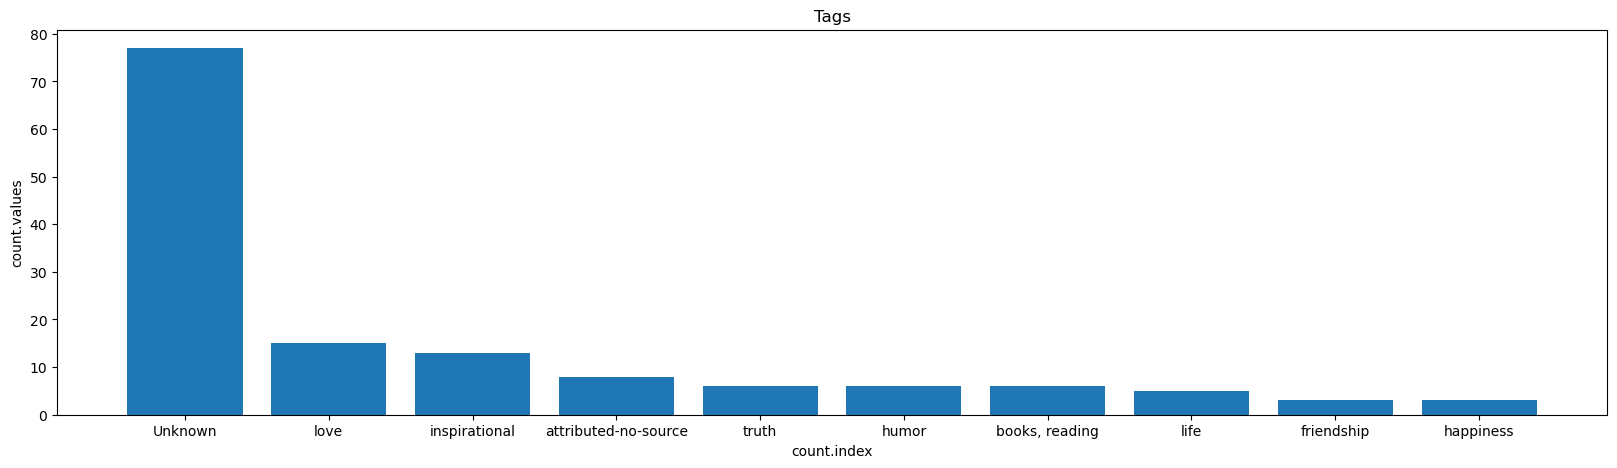

In [117]:
plt.figure(figsize=(20,5))
plt.title('Tags')
plt.xlabel('count.index')
plt.ylabel('count.values')
plt.bar(x=count.index,height=count.values)
plt.show()

The bargraph shows the frequency distribution of different tags in the datasets.

The 'Unknown' tag has a highest count, indicating that most quotes do not have a clearly defining tag.



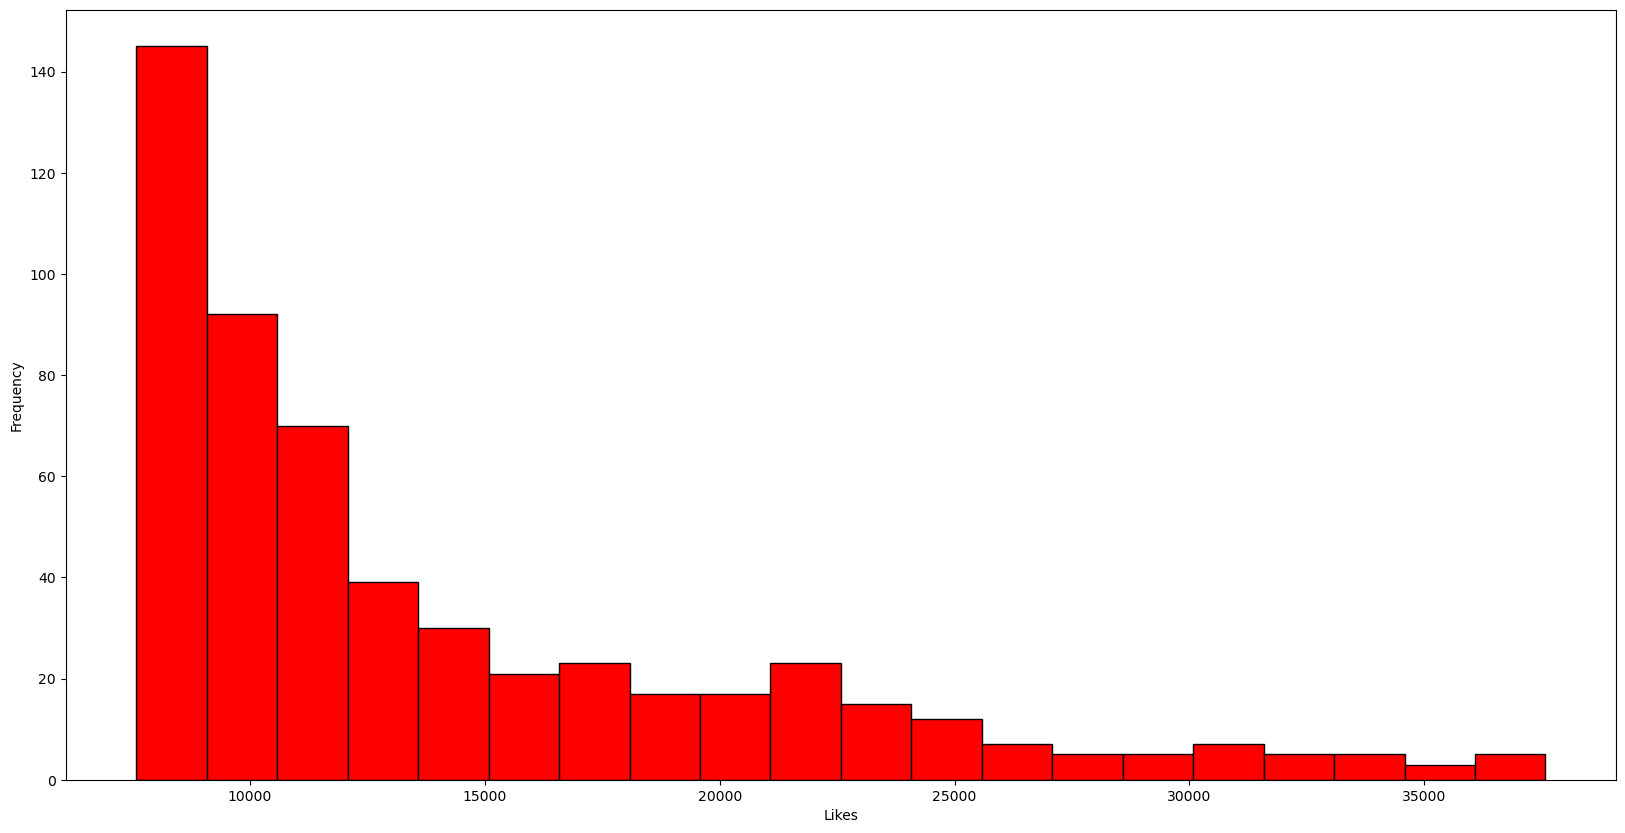

In [118]:
# Uni-Variate Visual Analysis for Numerical data

# Histogram
plt.figure(figsize=(20,10))
plt.hist(df['Likes'],bins=20,color='red',edgecolor='black')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of likes across quotes

Most quotes receive low to moderate likes,mainly concentrated below 15000 likes.

As The number of likes increases,frequency of quotes decreases sharply.

very few quotes receive high likes that they are indicating outliers

# By-Variate visual analysis

In [133]:
# Categorical vs Categorical - stacked bar graph'

df_exploded = df.explode('Tags')
top_tags = df_exploded['Tags'].value_counts().head(10).index
filtered_df = df_exploded[df_exploded['Tags'].isin(top_tags)]

<Figure size 1000x800 with 0 Axes>

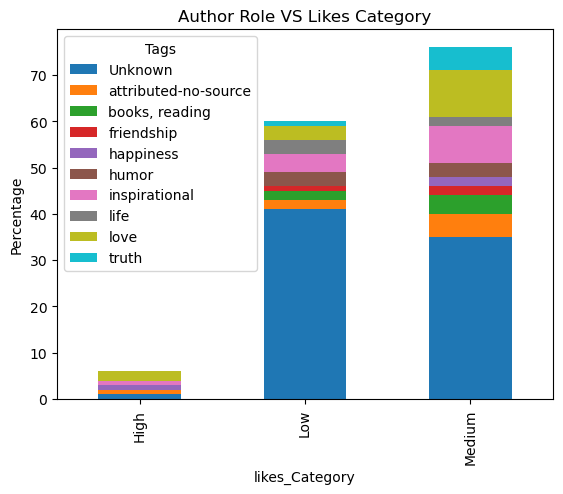

<Figure size 1000x800 with 0 Axes>

In [134]:
ct = pd.crosstab(df['likes_Category'],filtered_df['Tags'])
ct.plot(kind='bar',stacked=True)
plt.ylabel('Percentage')
plt.title('Author Role VS Likes Category')
plt.figure(figsize=(10,8))

The staced bar plot shows the distribution of likes categories(low,mid,high)for the author role.

medium and low likes contribute the highest number of records

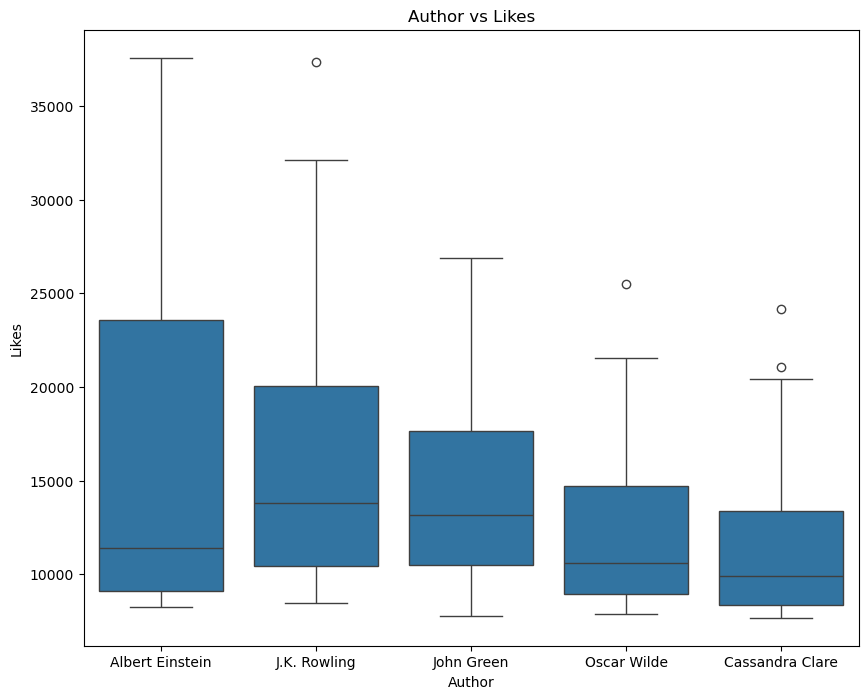

In [141]:
# Categorical vs Numerical - BoxPlot

top_authors = df['Author'].value_counts().head(5).index
filtered_df = df[df['Author'].isin(top_authors)]
plt.figure(figsize=(10,8))
sns.boxplot(data=filtered_df,x='Author',y='Likes')
plt.title('Author vs Likes')
plt.show()

The box plot shows the distribution of likes for the author role.

Most quotes receive  moderate likes,while a few quotes have very high likes, appering as outliers



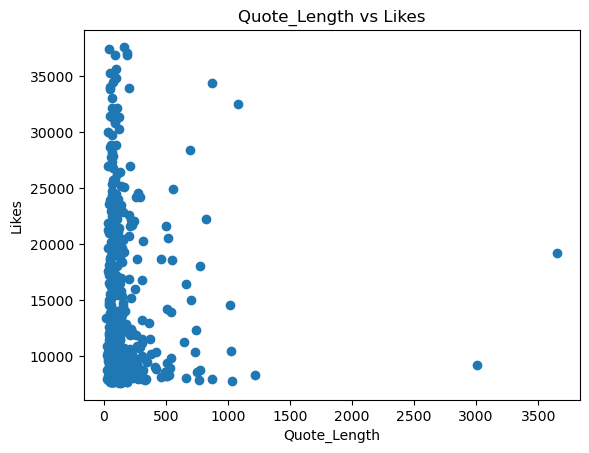

In [142]:
# Numerical vs Numerical -ScatterPLot

plt.scatter(df['Quote_Length'],df['Likes'])
plt.title('Quote_Length vs Likes')
plt.xlabel('Quote_Length')
plt.ylabel('Likes')
plt.show()

Their is no Strong linear relationship between quote_length and likes.

Most quotes are short and receive modrate likes and a few quotes achive very high likes,indicatiing preseence of outliers.